# IMPORT LYBERIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
warnings.simplefilter(action = "ignore")
from tabulate import tabulate
from termcolor import colored

## LOADING DATASET

In [2]:
data = pd.read_excel("Data.xlsx",skiprows=2)
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## DATA DESCRIPTION

In [3]:
data.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [4]:
data.dtypes

customerid      int64
age           float64
salary         object
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [5]:
# shape
data.shape

(45211, 19)

In [6]:
# descriptions
data.describe()

,customerid,age,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(6), 

In [8]:
#convert csv file.
data.to_csv("bank_data.csv")
data = pd.read_csv("bank_data.csv")
data

,Unnamed: 0,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## DATA CLEANING

In [9]:
sal=[]
for i in data["salary"]:
    if i=="?":
        sal.append(np.nan)
    else:
        sal.append(i)
sal

['100000',
 '60000',
 '120000',
 '20000',
 '0',
 '100000',
 '100000',
 '120000',
 '55000',
 '60000',
 '50000',
 '50000',
 '60000',
 '60000',
 '70000',
 '55000',
 '50000',
 '20000',
 '55000',
 '70000',
 '20000',
 '100000',
 '20000',
 '70000',
 '55000',
 '50000',
 '100000',
 '120000',
 '100000',
 '60000',
 '60000',
 '100000',
 '50000',
 '20000',
 '100000',
 '60000',
 '20000',
 '60000',
 '50000',
 '50000',
 '70000',
 '100000',
 '20000',
 '55000',
 '55000',
 '50000',
 '60000',
 '60000',
 '60000',
 '100000',
 '20000',
 '100000',
 '100000',
 '50000',
 '60000',
 '120000',
 '100000',
 '20000',
 '20000',
 '70000',
 '50000',
 '60000',
 '20000',
 '70000',
 '20000',
 '100000',
 '55000',
 '100000',
 '60000',
 '20000',
 '20000',
 '70000',
 '100000',
 '20000',
 '60000',
 '60000',
 '20000',
 '70000',
 '70000',
 '70000',
 '50000',
 '70000',
 '60000',
 '50000',
 '60000',
 '20000',
 '50000',
 '60000',
 '100000',
 '55000',
 '100000',
 '60000',
 '50000',
 '20000',
 '120000',
 '100000',
 '20000',
 '55000',


In [10]:
data["salary"]=sal

In [11]:
data

,Unnamed: 0,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [12]:
data["salary"]=data["salary"].astype("float")

In [13]:
salary_mean=data["salary"].mean()
age_mean=data["age"].mean()

In [14]:
data["age"].fillna(age_mean,inplace=True)   # replacing the null value of age and salary column by their mean value
data["salary"].fillna(salary_mean,inplace=True)
data.fillna( method ='ffill', inplace = True) # replacing the other null valur using fioward fill method

In [15]:
data.drop("Unnamed: 0",inplace=True,axis=1 )

In [16]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [17]:
df = data['jobedu'].str.split(',', expand=True)
df.rename(columns = {0:"job",1:"education"}, inplace = True)
data["job"] = df["job"]
data["education"] = df["education"]
import math
new_duration = []
for i in data.duration:
    x = (i.split())
    #print(x)
    if x[0].isalnum() and x[1] == "sec":
        #print("seconds")
        sec = i.split(" ")[0]
        #print(sec)
        h1 = math.ceil((float(sec)/60))
        new_duration.append(h1)
        #pass
    else:
        num2 = float(i.split(" ")[0])
        h2 = math.ceil(num2)
        new_duration.append(h2)

#print(len(new_duration))
data["Duration"] = new_duration
df1 = data['month'].str.split(',', expand=True)
df1.rename(columns = {0:"months",1:"year"}, inplace = True)
data["months"] = df1["months"]
data["year"] = df1["year"]

In [18]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,campaign,pdays,previous,poutcome,response,job,education,Duration,months,year
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,...,1,-1,0,unknown,no,management,tertiary,5,may,2017
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,...,1,-1,0,unknown,no,technician,secondary,3,may,2017
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,1,-1,0,unknown,no,entrepreneur,secondary,2,may,2017
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,...,1,-1,0,unknown,no,blue-collar,unknown,2,may,2017
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,...,1,-1,0,unknown,no,unknown,unknown,4,may,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,...,3,-1,0,unknown,yes,technician,tertiary,17,nov,2017
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,...,2,-1,0,unknown,yes,retired,primary,8,nov,2017
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,...,5,184,3,success,yes,retired,secondary,19,nov,2017
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,...,4,-1,0,unknown,no,blue-collar,secondary,9,nov,2017


## DATA ANALYSIS

## UNIVARIATE ANALYSIS

### CATEGORICAL DATA

In [19]:
data.drop(['jobedu', 'month', 'duration'], axis = 1, inplace = True)

In [20]:
objects = ["object"]
df_o = data.select_dtypes(include=objects)
df_o.columns

Index(['marital', 'targeted', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'response', 'job', 'education', 'months', 'year'],
      dtype='object')

## marital

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object
*-------------------------------------*
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='marital', ylabel='count'>

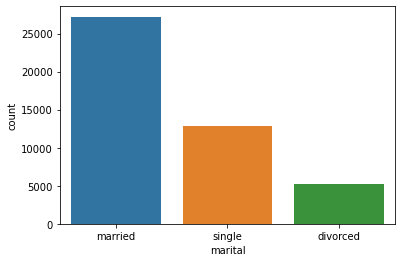

In [21]:
print(data["marital"].describe())
print("*-------------------------------------*")
print(data["marital"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "marital", data = data)

## targeted

count     45211
unique        2
top         yes
freq      37091
Name: targeted, dtype: object
*-------------------------------------*
yes    37091
no      8120
Name: targeted, dtype: int64
*-------------------------------------*


<AxesSubplot:ylabel='targeted'>

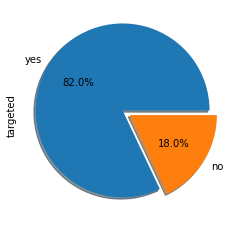

In [93]:
print(data["targeted"].describe())
print("*-------------------------------------*")
print(data["targeted"].value_counts())
print("*-------------------------------------*")
data['targeted'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',shadow=True)

## default

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object
*-------------------------------------*
no     44396
yes      815
Name: default, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='default', ylabel='count'>

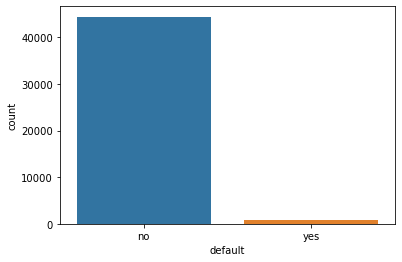

In [23]:
print(data["default"].describe())
print("*-------------------------------------*")
print(data["default"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "default", data = data)

## housing

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object
*-------------------------------------*
yes    25130
no     20081
Name: housing, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='housing', ylabel='count'>

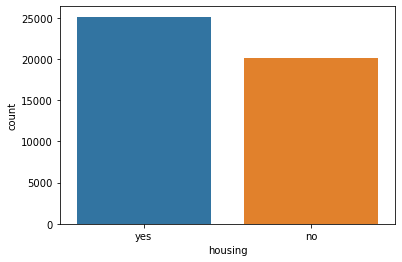

In [24]:
print(data["housing"].describe())
print("*-------------------------------------*")
print(data["housing"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "housing", data = data)

## loan

count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object
*-------------------------------------*
no     37967
yes     7244
Name: loan, dtype: int64
*-------------------------------------*


<AxesSubplot:ylabel='loan'>

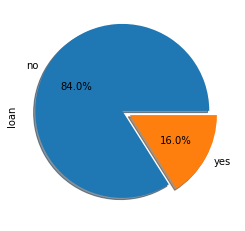

In [94]:

print(data["loan"].describe())
print("*-------------------------------------*")
print(data["loan"].value_counts())
print("*-------------------------------------*")
data['loan'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',shadow=True)

## contact

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object
*-------------------------------------*
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='contact', ylabel='count'>

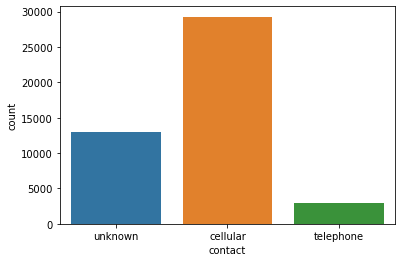

In [26]:
print(data["contact"].describe())
print("*-------------------------------------*")
print(data["contact"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "contact", data = data)

## poutcome

count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object
*-------------------------------------*
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='poutcome', ylabel='count'>

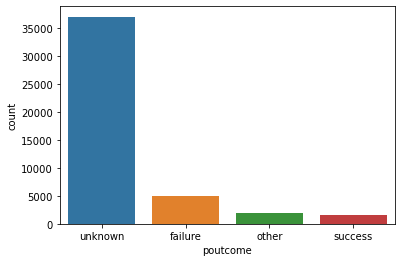

In [27]:
print(data["poutcome"].describe())
print("*-------------------------------------*")
print(data["poutcome"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "poutcome", data = data)

## response

count     45211
unique        2
top          no
freq      39919
Name: response, dtype: object
*-------------------------------------*
no     39919
yes     5292
Name: response, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='response', ylabel='count'>

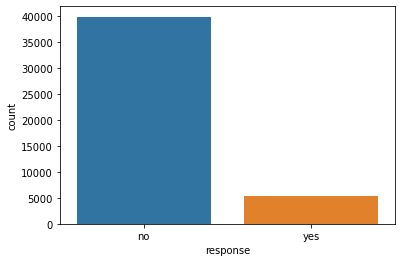

In [28]:
print(data["response"].describe())
print("*-------------------------------------*")
print(data["response"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "response", data = data)

## job 

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object
*-------------------------------------*
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
*-------------------------------------*


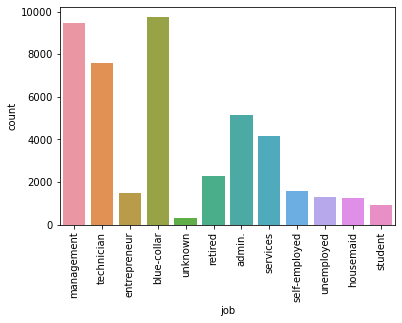

In [29]:
print(data["job"].describe())
print("*-------------------------------------*")
print(data["job"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "job", data = data)
plt.xticks(rotation = 90)
plt.show()

## education

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object
*-------------------------------------*
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='education', ylabel='count'>

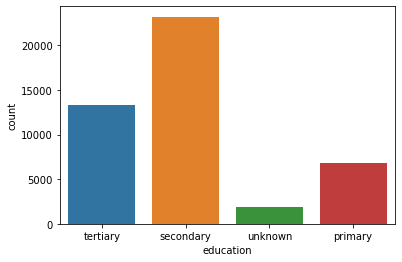

In [30]:
print(data["education"].describe())
print("*-------------------------------------*")
print(data["education"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "education", data = data)

## months

count     45211
unique       12
top         may
freq      13766
Name: months, dtype: object
*-------------------------------------*
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: months, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='months', ylabel='count'>

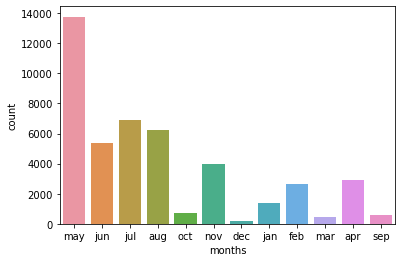

In [31]:
print(data["months"].describe())
print("*-------------------------------------*")
print(data["months"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "months", data = data)

## year

count     45211
unique        1
top        2017
freq      45211
Name: year, dtype: object
*-------------------------------------*
 2017    45211
Name: year, dtype: int64
*-------------------------------------*


<AxesSubplot:xlabel='year', ylabel='count'>

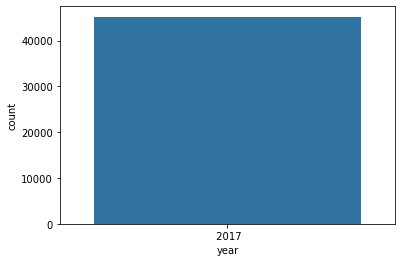

In [32]:
print(data["year"].describe())
print("*-------------------------------------*")
print(data["year"].value_counts())
print("*-------------------------------------*")
sns.countplot(x= "year", data = data)

### NUMERICAL DATA

In [33]:
numerics = ['float64', 'int64','int32']
df_n = data.select_dtypes(include=numerics)
df_n.columns

Index(['customerid', 'age', 'salary', 'balance', 'day', 'campaign', 'pdays',
       'previous', 'Duration'],
      dtype='object')

## age

count    45211.000000
mean        40.935651
std         10.616848
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='age', ylabel='Density'>

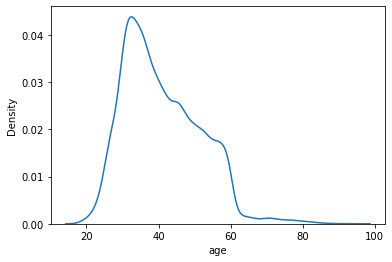

In [34]:
print(data["age"].describe())
print("*-------------------------------------*")
sns.kdeplot(x= "age", data = data)

## salary 

count     45211.000000
mean      57084.453698
std       32016.099611
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='salary'>

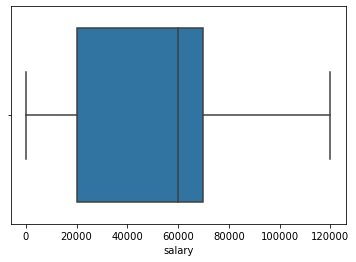

In [35]:
print(data["salary"].describe())
print("*-------------------------------------*")
sns.boxplot(x= "salary", data = data)

## balance

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='balance', ylabel='Density'>

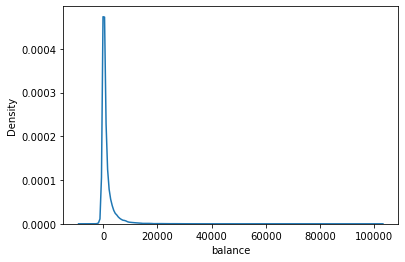

In [36]:
print(data["balance"].describe())
print("*-------------------------------------*")
sns.kdeplot(x= "balance", data = data)

## day

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='day'>

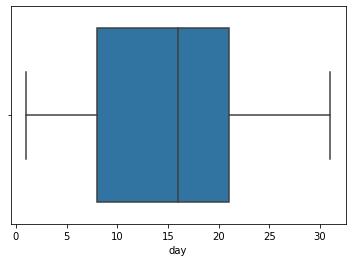

In [37]:
print(data["day"].describe())
print("*-------------------------------------*")
sns.boxplot(x= "day", data = data)

## campaign

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='campaign'>

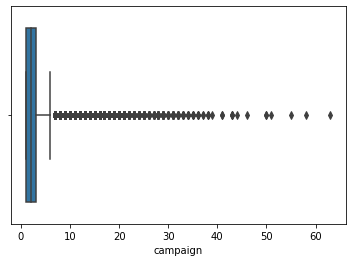

In [38]:
print(data["campaign"].describe())
print("*-------------------------------------*")
sns.boxplot(x= "campaign", data = data)

## pdays

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='pdays', ylabel='Density'>

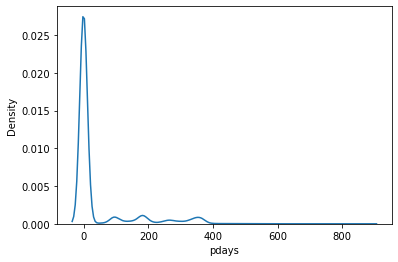

In [39]:
print(data["pdays"].describe())
print("*-------------------------------------*")
sns.kdeplot(x= "pdays", data = data)

## previous

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='previous', ylabel='Density'>

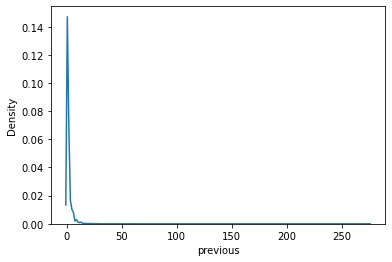

In [40]:
print(data["previous"].describe())
print("*-------------------------------------*")
sns.kdeplot(x= "previous", data = data)

## Duration

count    45211.000000
mean         4.801884
std          4.293688
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         82.000000
Name: Duration, dtype: float64
*-------------------------------------*


<AxesSubplot:xlabel='Duration', ylabel='Density'>

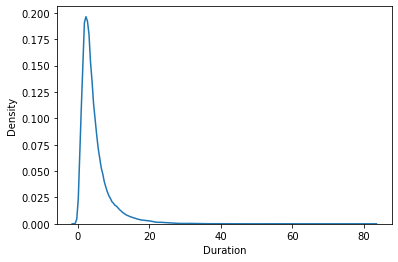

In [41]:
print(data["Duration"].describe())
print("*-------------------------------------*")
sns.kdeplot(x= "Duration", data = data)

### Bi variate Analysis and mulivariate:
- Numerical and Categorical variable
    - barplot
    - boxplot
    - violinplot
    - stirplot
    - stripplot
    - scatterplot

In [42]:
print(df_n.columns)
df_o.columns

Index(['customerid', 'age', 'salary', 'balance', 'day', 'campaign', 'pdays',
       'previous', 'Duration'],
      dtype='object')


Index(['marital', 'targeted', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'response', 'job', 'education', 'months', 'year'],
      dtype='object')

#### age vs  marital
#### salary vs marital
#### balance vs marital
#### Duration vs marital

<AxesSubplot:xlabel='marital', ylabel='Duration'>

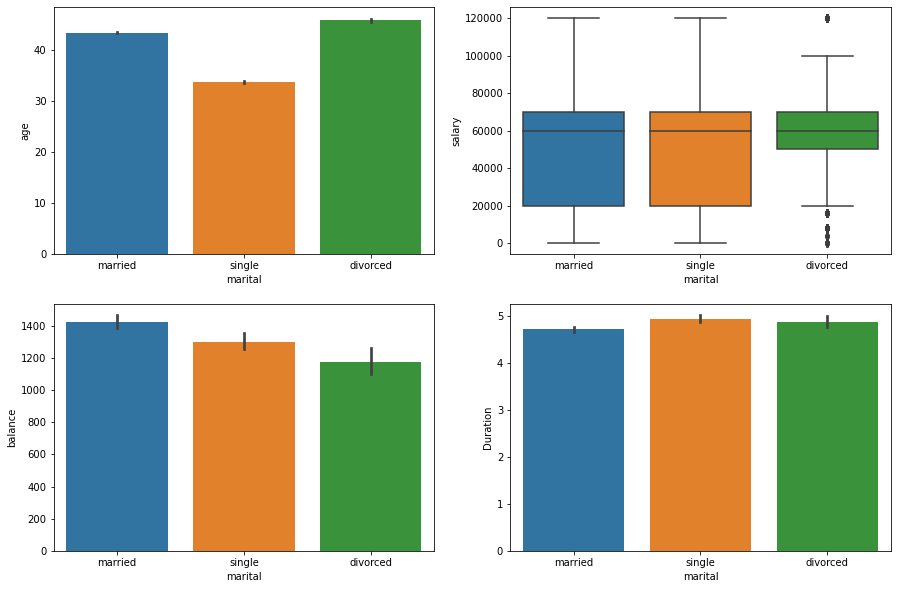

In [43]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=2,ncols=2)
sns.barplot(x=data['marital'],y=data["age"], ax=axs[0][0])
sns.boxplot(x=data['marital'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['marital'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['marital'],y=data["Duration"], ax=axs[1][1])

<AxesSubplot:xlabel='marital', ylabel='previous'>

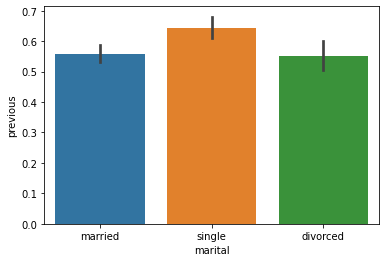

In [44]:
sns.barplot(x=data['marital'],y=data["previous"])

campaign  vs housing

salary vs housing

balance vs housing

previous vs housing

<AxesSubplot:xlabel='housing', ylabel='Duration'>

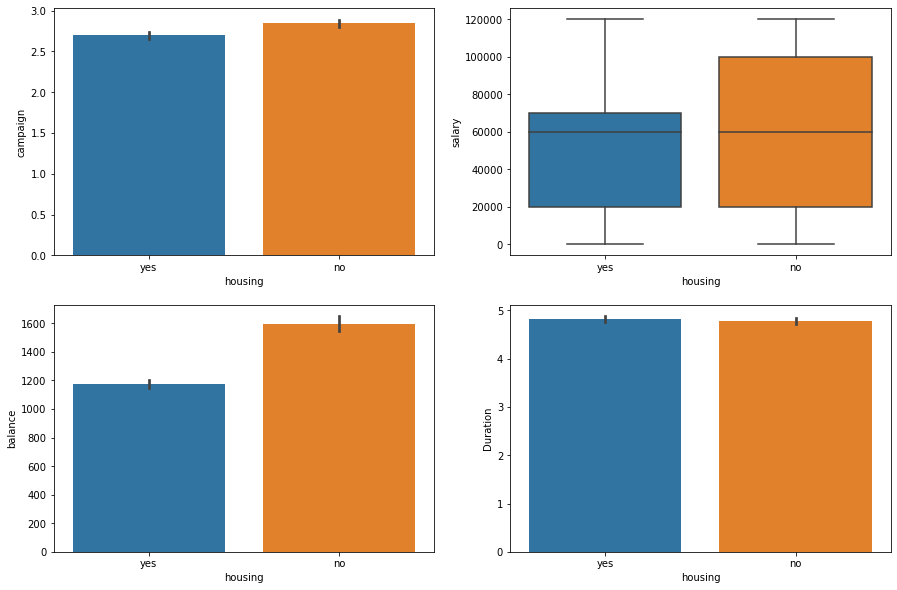

In [45]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=2,ncols=2)
sns.barplot(x=data['housing'],y=data["campaign"], ax=axs[0][0])
sns.boxplot(x=data['housing'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['housing'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['housing'],y=data["Duration"], ax=axs[1][1])

<AxesSubplot:xlabel='housing', ylabel='previous'>

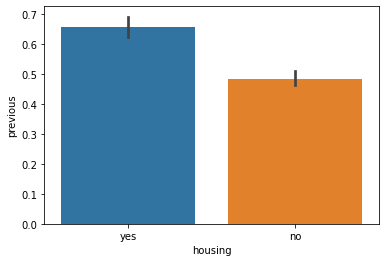

In [46]:
sns.barplot(x=data['housing'],y=data["previous"])

salary vs targeted

balance vs targeted

campaign vs  targeted

previous vs  targeted

Duration vs  targeted

<AxesSubplot:xlabel='targeted', ylabel='Duration'>

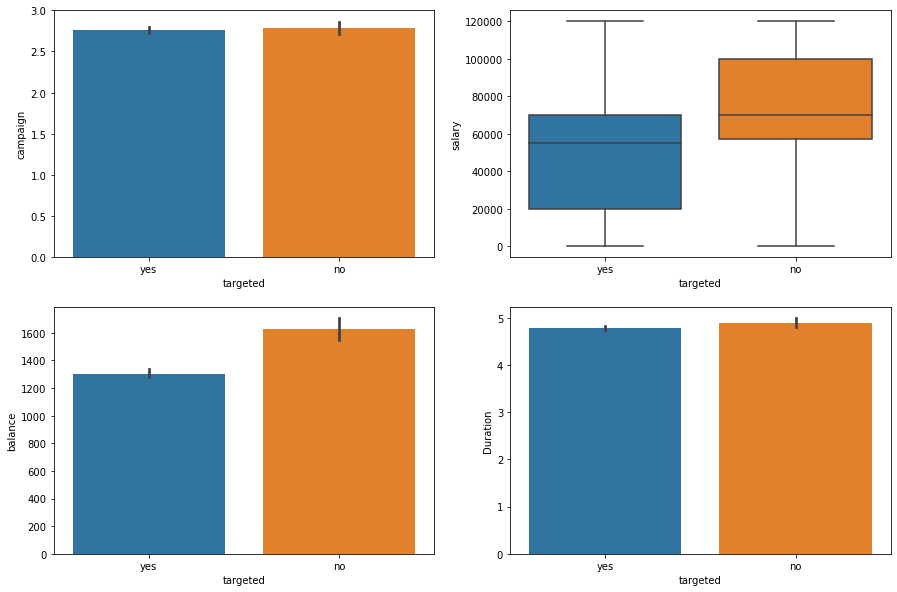

In [47]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=2,ncols=2)
sns.barplot(x=data['targeted'],y=data["campaign"], ax=axs[0][0])
sns.boxplot(x=data['targeted'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['targeted'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['targeted'],y=data["Duration"], ax=axs[1][1])

<AxesSubplot:xlabel='targeted', ylabel='previous'>

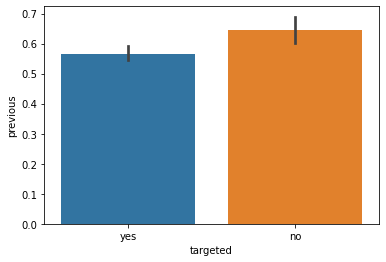

In [48]:
sns.barplot(x=data['targeted'],y=data["previous"])

age vs  loan

salary vs loan

balance vs loan

campaign vs  loan

previous vs  loan

Duraytion vs  loan

<AxesSubplot:xlabel='loan', ylabel='Duration'>

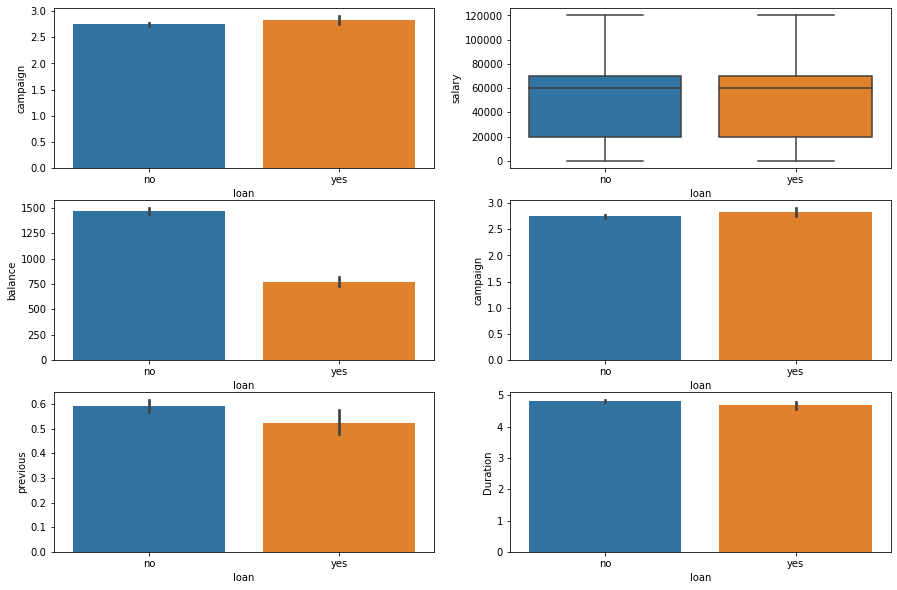

In [49]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=3,ncols=2)
sns.barplot(x=data['loan'],y=data["campaign"], ax=axs[0][0])
sns.boxplot(x=data['loan'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['loan'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['loan'],y=data["campaign"], ax=axs[1][1])
sns.barplot(x=data['loan'],y=data["previous"], ax=axs[2][0])
sns.barplot(x=data['loan'],y=data["Duration"], ax=axs[2][1])

age vs  response

salary vs response

balance vs response

campaign vs  response

previous vs  response

Duration vs  response

<AxesSubplot:xlabel='response', ylabel='Duration'>

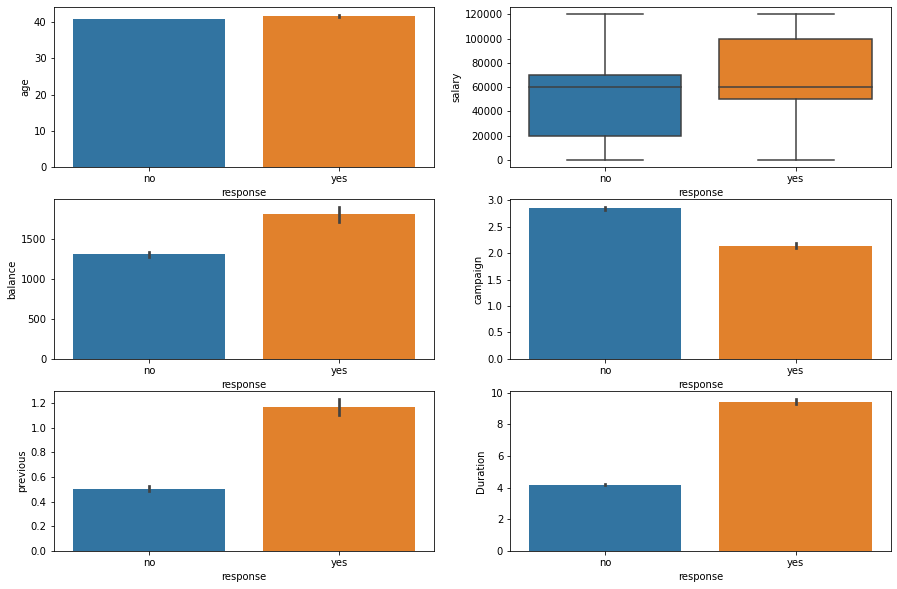

In [50]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=3,ncols=2)
sns.barplot(x=data['response'],y=data["age"], ax=axs[0][0])
sns.boxplot(x=data['response'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['response'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['response'],y=data["campaign"], ax=axs[1][1])
sns.barplot(x=data['response'],y=data["previous"], ax=axs[2][0])
sns.barplot(x=data['response'],y=data["Duration"], ax=axs[2][1])

age vs job

salary vs job

balance vs job

campaign vs job

previous vs job

Duration vs job

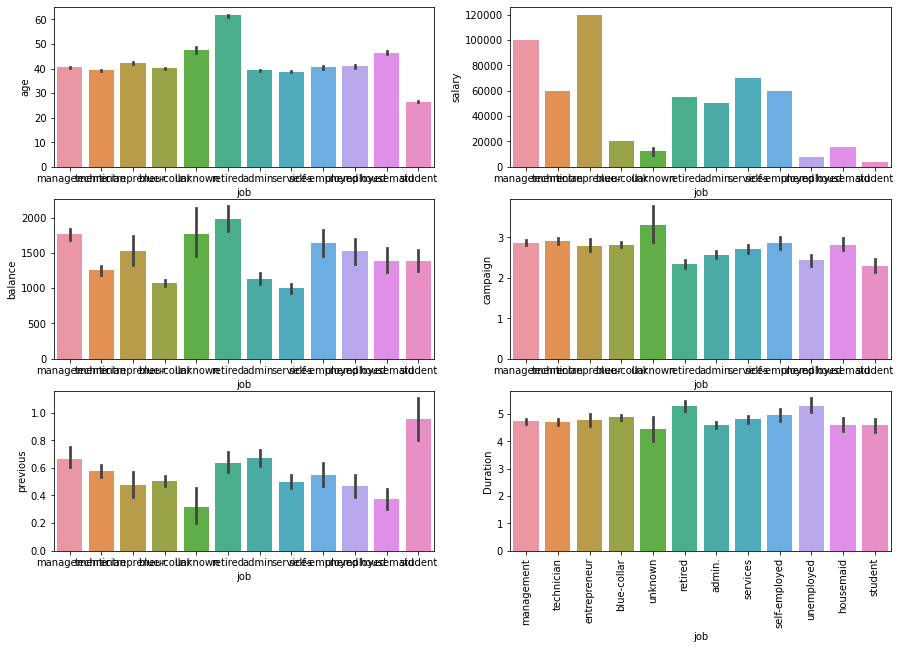

In [51]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=3,ncols=2)
sns.barplot(x=data['job'],y=data["age"], ax=axs[0][0])
sns.barplot(x=data['job'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['job'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['job'],y=data["campaign"], ax=axs[1][1])
sns.barplot(x=data['job'],y=data["previous"], ax=axs[2][0])
sns.barplot(x=data['job'],y=data["Duration"], ax=axs[2][1])
plt.xticks(rotation = 90)
plt.show()

age vs education

salary vs education

balance vs education

campaign vs education

previous vs education

Duration vs education

<AxesSubplot:xlabel='education', ylabel='Duration'>

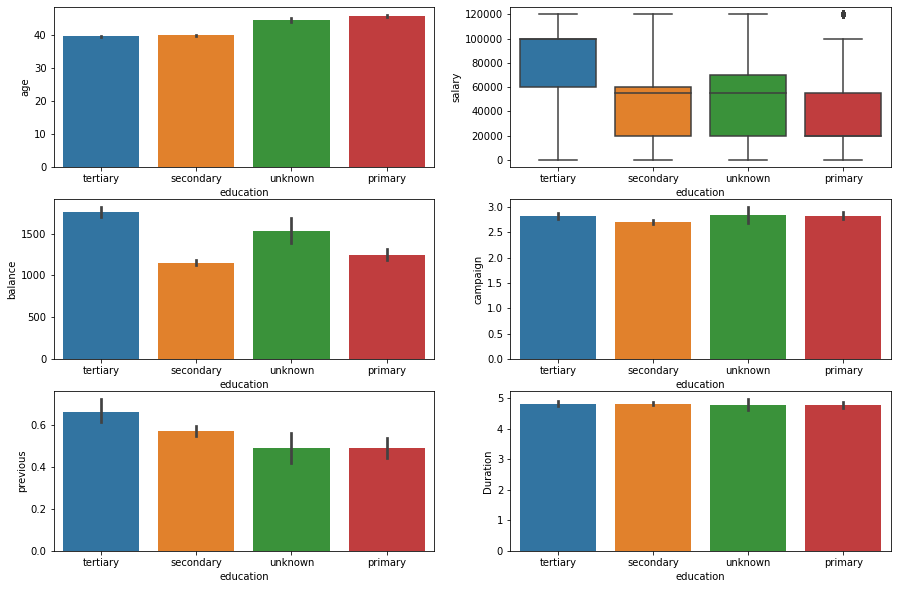

In [52]:
fig, axs = plt.subplots(figsize=(15, 10),nrows=3,ncols=2)
sns.barplot(x=data['education'],y=data["age"], ax=axs[0][0])
sns.boxplot(x=data['education'],y=data["salary"], ax=axs[0][1])
sns.barplot(x=data['education'],y=data["balance"], ax=axs[1][0])
sns.barplot(x=data['education'],y=data["campaign"], ax=axs[1][1])
sns.barplot(x=data['education'],y=data["previous"], ax=axs[2][0])
sns.barplot(x=data['education'],y=data["Duration"], ax=axs[2][1])

## OUTLIER TREATMENT

In [53]:
numerics = ['float64', 'int64','int32']
df = data.select_dtypes(include=numerics)
df

,customerid,age,salary,balance,day,campaign,pdays,previous,Duration
0,1,58.0,100000.0,2143,5,1,-1,0,5
1,2,44.0,60000.0,29,5,1,-1,0,3
2,3,33.0,120000.0,2,5,1,-1,0,2
3,4,47.0,20000.0,1506,5,1,-1,0,2
4,5,33.0,0.0,1,5,1,-1,0,4
...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,17,3,-1,0,17
45207,45208,71.0,55000.0,1729,17,2,-1,0,8
45208,45209,72.0,55000.0,5715,17,5,184,3,19
45209,45210,57.0,20000.0,668,17,4,-1,0,9


In [54]:
for feature in df:
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper)].any(axis=None):
        print(feature,":-yes")
        print("*--------------*")
    else:
        print(feature, ":-no")
        print("*--------------*")

customerid :-no
*--------------*
age :-yes
*--------------*
salary :-no
*--------------*
balance :-yes
*--------------*
day :-no
*--------------*
campaign :-yes
*--------------*
pdays :-yes
*--------------*
previous :-yes
*--------------*
Duration :-yes
*--------------*


<AxesSubplot:xlabel='Duration'>

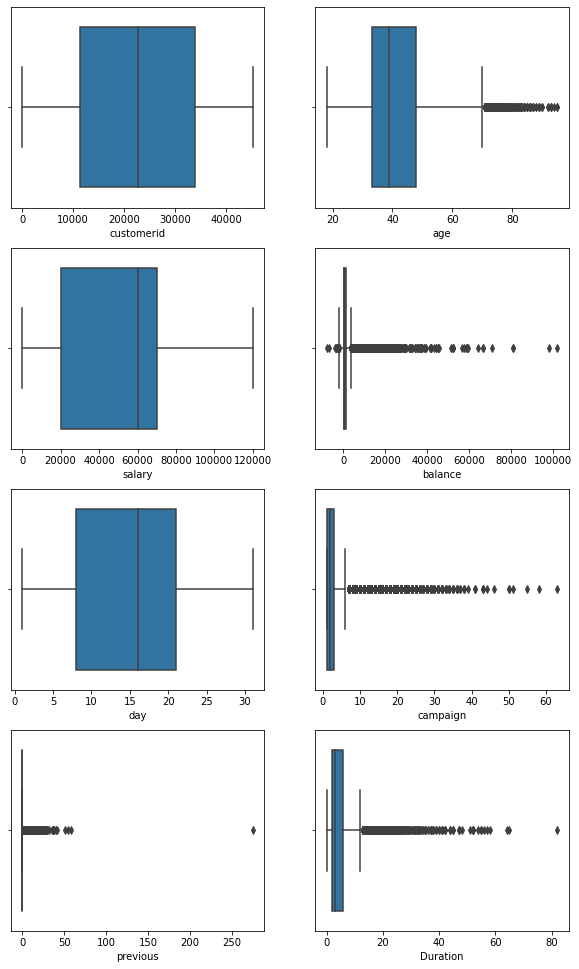

In [55]:
fig, axs = plt.subplots(figsize=(10, 17),nrows=4,ncols=2)
sns.boxplot(x=data["customerid"], ax=axs[0][0])
sns.boxplot(x=data["age"], ax=axs[0][1])
sns.boxplot(x=data["salary"], ax=axs[1][0])
sns.boxplot(x=data["balance"], ax=axs[1][1])
sns.boxplot(x=data["day"], ax=axs[2][0])
sns.boxplot(x=data["campaign"], ax=axs[2][1])
sns.boxplot(x=data["previous"], ax=axs[3][0])
sns.boxplot(x=data["Duration"], ax=axs[3][1])

In [56]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

,customerid,age,salary,balance,day,campaign,pdays,previous,Duration
customerid,1.000000,0.014902,0.040000,0.073639,-0.061465,-0.102884,0.437729,0.271098,0.013089
age,0.014902,1.000000,0.026233,0.097744,-0.009182,0.004851,-0.023765,0.001329,-0.004845
salary,0.040000,0.026233,1.000000,0.056322,0.027688,0.015300,-0.015560,0.014186,-0.009208
balance,0.073639,0.097744,0.056322,1.000000,0.004503,-0.014578,0.003435,0.016674,0.021527
day,-0.061465,-0.009182,0.027688,0.004503,1.000000,0.162490,-0.093044,-0.051710,-0.029670
campaign,-0.102884,0.004851,0.015300,-0.014578,0.162490,1.000000,-0.088628,-0.032855,-0.081706
pdays,0.437729,-0.023765,-0.015560,0.003435,-0.093044,-0.088628,1.000000,0.454820,-0.001104
previous,0.271098,0.001329,0.014186,0.016674,-0.051710,-0.032855,0.454820,1.000000,0.001688
Duration,0.013089,-0.004845,-0.009208,0.021527,-0.029670,-0.081706,-0.001104,0.001688,1.000000


## Statistics Manipulations:


### 1. Find the correlation between the columns and draw the observations from it.

Text(0.5, 1.0, 'Features Correlation')

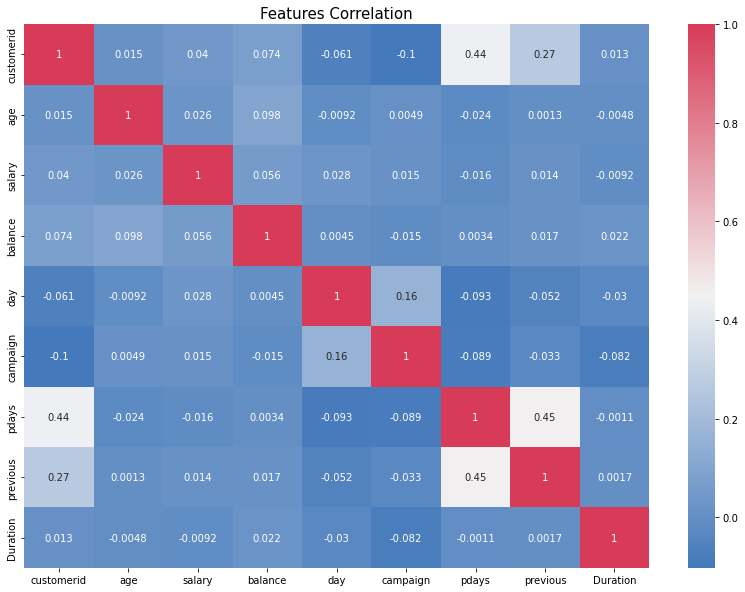

In [57]:
color = sns.diverging_palette(250, 6, as_cmap = True)

plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), cmap = color, annot = True)
plt.title("Features Correlation", fontsize = 15)

### 2. Find the mean of every column response wise and draw the observations.


In [58]:
data_mean = pd.DataFrame(data.mean(), columns=['response'])

#create list of mean values
mean_list = data.mean().to_list

In [59]:
mean_list

<bound method IndexOpsMixin.tolist of customerid    22606.000000
age              40.935651
salary        57084.453698
balance        1362.272058
day              15.806419
campaign          2.763841
pdays            40.197828
previous          0.580323
Duration          4.801884
dtype: float64>

### 3. Find the Best features using correlation and Chi-square test.


In [60]:
from scipy import stats

In [61]:
def chisquare_test_result(data,col):    
    data_crosstab = pd.crosstab(data['response'],data[col])
    stat,p,dof,exp = stats.chi2_contingency(data_crosstab)
    print(colored('p-value: {}'.format(p),attrs=['bold']))
    if p < 0.05:
        #print('Reject H0: {} and response columns are dependent'.format(col))
        print(colored('Reject H0: {} and response columns are dependent'.format(col), 'blue', attrs=['bold']))
    else:
        #print('Failed Reject H0: {} and response columns are independent'.format(col))
        print(colored('Failed Reject H0: {} and response columns are independent'.format(col), 'green', attrs=['bold']))

In [62]:
for col in data.columns:
    print(chisquare_test_result(data,col))

p-value: 0.49778882923322154
Failed Reject H0: customerid and response columns are independent
None
p-value: 2.8888596736141575e-291
Reject H0: age and response columns are dependent
None
p-value: 1.5735225816063904e-173
Reject H0: salary and response columns are dependent
None
p-value: 2.540495233843445e-97
Reject H0: balance and response columns are dependent
None
p-value: 1.8681472648318553e-43
Reject H0: marital and response columns are dependent
None
p-value: 9.381911967425468e-49
Reject H0: targeted and response columns are dependent
None
p-value: 2.3968431957588926e-06
Reject H0: default and response columns are dependent
None
p-value: 2.0228727874528705e-192
Reject H0: housing and response columns are dependent
None
p-value: 2.36941212118494e-47
Reject H0: loan and response columns are dependent
None
p-value: 1.8111970652423886e-225
Reject H0: contact and response columns are dependent
None
p-value: 1.41698919630425e-102
Reject H0: day and response columns are dependent
None
p-

### 4. Find the relation of salary and age column using statistical tests and draw the observations from it.


In [63]:
new_age = []
for i in data["age"]:
    if i<30.0:
        new_age.append("18-29")
    elif i>=30.0 and i<50.0:
        new_age.append("30-49")
    elif i>=50.0 and i<70.0:
        new_age.append("50-69")
    elif i>=70.0 and i<90.0:
        new_age.append("70-89")
    else:
        new_age.append("90-95")

In [64]:
data['age'].min(),data['age'].max()
data["new_age"] = new_age

In [65]:
data["new_age"].dtypes

dtype('O')

In [66]:
data['salary'].min(),data['salary'].max()

(0.0, 120000.0)

In [67]:
new_salary = []
for i in data["salary"]:
    if i> 0.0 and i<15000.0:
        new_salary.append("0-15000")
    elif i>=15000.0 and i<30000.0:
        new_salary.append("15000-30000")
    elif i>=30000.0 and i<60000.0:
        new_salary.append("30000-60000")
    else:
        new_salary.append("60000-120000")
data["new_salary"] = new_salary

In [68]:
crosstab = pd.crosstab(data['new_salary'],data['new_age'])
#crosstab
#print(tabulate(crosstab, headers = 'keys', tablefmt = 'grid'))
print(colored(tabulate(crosstab, headers = 'keys', tablefmt = 'grid'), 'blue', attrs=['bold']))

+--------------+---------+---------+---------+---------+---------+
| new_salary   |   18-29 |   30-49 |   50-69 |   70-89 |   90-95 |
+==============+=========+=========+=========+=========+=========+
| 0-15000      |     877 |    1064 |     300 |       0 |       0 |
+--------------+---------+---------+---------+---------+---------+
| 15000-30000  |    1188 |    7547 |    2216 |      21 |       0 |
+--------------+---------+---------+---------+---------+---------+
| 30000-60000  |     756 |    3698 |    2549 |     485 |       9 |
+--------------+---------+---------+---------+---------+---------+
| 60000-120000 |    2450 |   17443 |    4569 |      39 |       0 |
+--------------+---------+---------+---------+---------+---------+


In [69]:
crosstab = pd.crosstab(data['new_salary'],data['new_age'])
crosstab

new_age,18-29,30-49,50-69,70-89,90-95
new_salary,,,,,
0-15000,877,1064,300,0,0
15000-30000,1188,7547,2216,21,0
30000-60000,756,3698,2549,485,9
60000-120000,2450,17443,4569,39,0


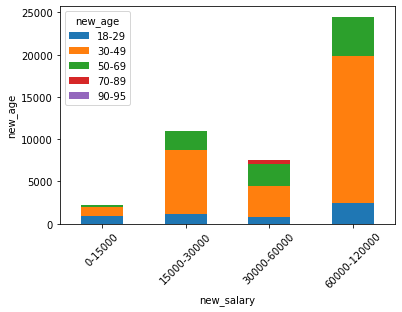

In [70]:
crosstab.plot(kind="bar", 
                 stacked=True)
plt.ylabel("new_age")
plt.xticks(rotation = 45)
plt.show()

### 5. Using statistical analysis find that is age column is impacting the duration column or not.


In [71]:
data[['age','Duration']].cov()

,age,Duration
age,112.717471,-0.220866
Duration,-0.220866,18.435755


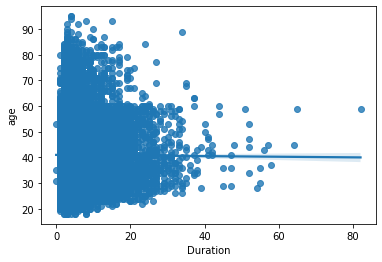

In [72]:
sns.regplot(data['Duration'],data['age'])
plt.show()

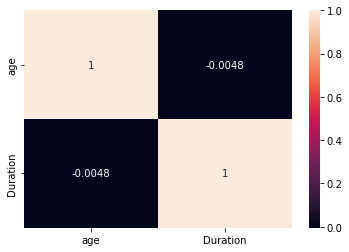

In [73]:
sns.heatmap(data[['age','Duration']].corr(), annot=True)
plt.show()

### 6. Show that the columns are following the Normal Distribution or not, if not following try to convert it non-normal to normal. (use transformation techniques)


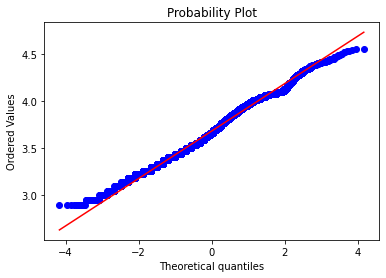

In [74]:
stats.probplot(np.log(data['age']),plot = plt);

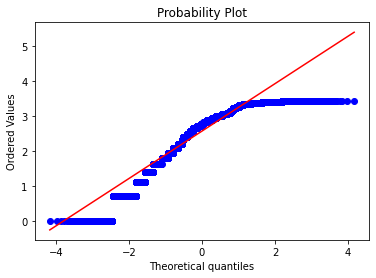

In [75]:
stats.probplot(np.log(data['day']),plot = plt);

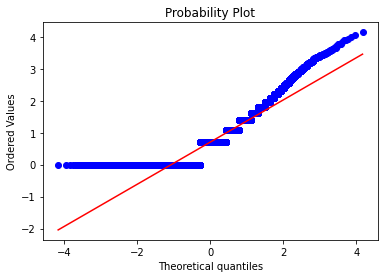

In [76]:
stats.probplot(np.log(data['campaign']),plot = plt);

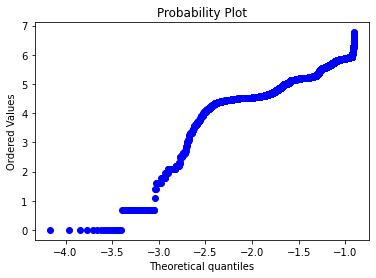

In [77]:
stats.probplot(np.log(data['pdays']),plot = plt);

In [78]:
pdays = data['pdays'].values


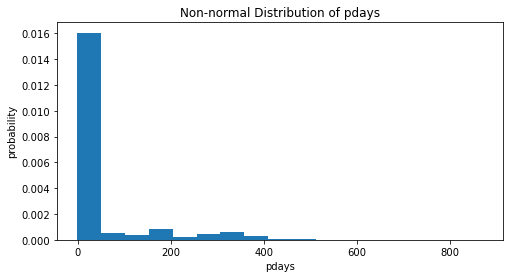

In [79]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(pdays, bins='auto', density=True)
ax.set_xlabel('pdays')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution of pdays');

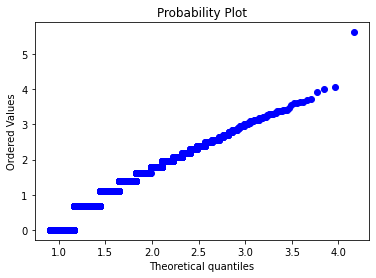

In [80]:
stats.probplot(np.log(data['previous']),plot = plt);

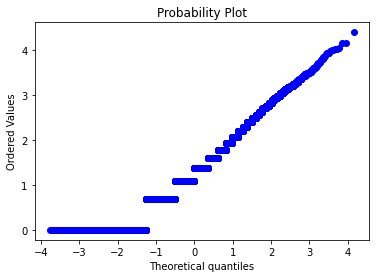

In [81]:
stats.probplot(np.log(data['Duration']),plot = plt);

### 7. Let’s check do we have any statistical patterns in the Data frame (using plots or analysis)

In [82]:
data["new_salary"].value_counts()

60000-120000    24501
15000-30000     10972
30000-60000      7497
0-15000          2241
Name: new_salary, dtype: int64

In [83]:
data.dtypes

customerid      int64
age           float64
salary        float64
balance         int64
marital        object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
job            object
education      object
Duration        int64
months         object
year           object
new_age        object
new_salary     object
dtype: object

In [84]:
data.head(2)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,previous,poutcome,response,job,education,Duration,months,year,new_age,new_salary
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,...,0,unknown,no,management,tertiary,5,may,2017,50-69,60000-120000
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,...,0,unknown,no,technician,secondary,3,may,2017,30-49,60000-120000


<AxesSubplot:xlabel='poutcome', ylabel='age'>

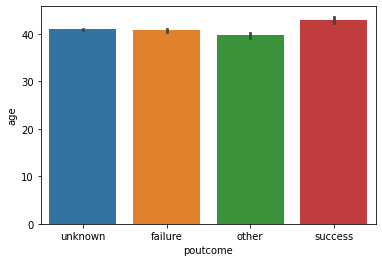

In [85]:
sns.barplot(x = "poutcome", y ="age", data = data)

In [86]:
data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [87]:
data["response"].value_counts()

no     39919
yes     5292
Name: response, dtype: int64

+------------+-----------+---------------+---------------+----------------+
| poutcome   |   0-15000 |   15000-30000 |   30000-60000 |   60000-120000 |
+============+===========+===============+===============+================+
| failure    |       229 |          1165 |           876 |           2631 |
+------------+-----------+---------------+---------------+----------------+
| other      |       118 |           427 |           324 |            971 |
+------------+-----------+---------------+---------------+----------------+
| success    |       151 |           177 |           380 |            803 |
+------------+-----------+---------------+---------------+----------------+
| unknown    |      1743 |          9203 |          5917 |          20096 |
+------------+-----------+---------------+---------------+----------------+


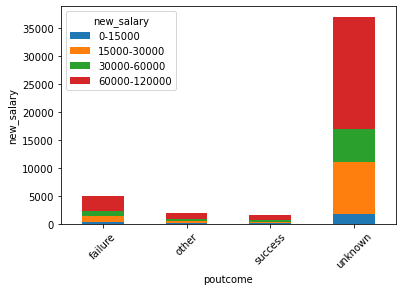

In [88]:
crosstab = pd.crosstab(data['poutcome'],data['new_salary'])
print(colored(tabulate(crosstab, headers = 'keys', tablefmt = 'grid'), 'blue', attrs=['bold']))
crosstab.plot(kind="bar", 
                 stacked=True)
plt.ylabel("new_salary")
#plt.ylim(0,5000)
plt.xticks(rotation = 45)
plt.show()

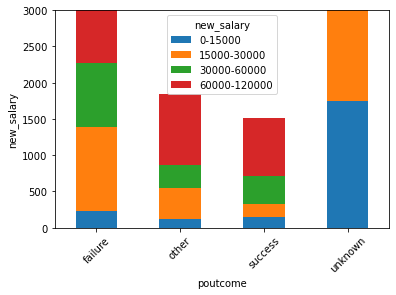

In [89]:
crosstab.plot(kind="bar", 
                 stacked=True)
plt.ylabel("new_salary")
plt.ylim(0,3000)
plt.xticks(rotation = 45)
plt.show()

In [90]:
job1 = data["job"].iloc[0:6]
jon

NameError: name 'jon' is not defined

In [ ]:
crosstab = pd.crosstab(data['response'],data['education'])
print(colored(tabulate(crosstab, headers = 'keys', tablefmt = 'grid'), 'blue', attrs=['bold']))
crosstab.plot(kind="bar", 
                 stacked=True)
plt.ylabel("education")
#plt.ylim(0,6000)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
crosstab = pd.crosstab(data['response'],data['poutcome'])
print(colored(tabulate(crosstab, headers = 'keys', tablefmt = 'grid'), 'blue', attrs=['bold']))
crosstab.plot(kind="bar", 
                 stacked=True)
plt.ylabel("job")
#plt.ylim(0,6000)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
data["response"].value_counts(),len(data),data["targeted"].value_counts() 